## UCLA ECE C147/C247 Winter 2022 - PyTorch Tutorial

In [1]:
%matplotlib inline

In [2]:
import torch
print(torch.__version__)

1.10.2


## Tensors


Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll
be right at home with the Tensor API. If not, follow along in this quick
API walkthrough.



## Tensor Initialization

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.

In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa)

In [4]:
import torch
import numpy as np 

data = [[1, 2],[3, 4]]
np_array = np.array(data)

# numpy array to torch tensor
x_tensor = torch.from_numpy(np_array)

# torch tensor to numpy array
x_array =  x_tensor.numpy()

print('x_tensor is:', x_tensor)
print('x_array is', x_array)

x_tensor is: tensor([[1, 2],
        [3, 4]])
x_array is [[1 2]
 [3 4]]


### Copy to device

In [5]:
# get the device, either cuda or cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('device type is {}'.format(device))

# copy tensor to the corresponding device
x_tensor = x_tensor.to(device)

print('x_tensor is {}'.format(x_tensor))

device type is cpu
x_tensor is tensor([[1, 2],
        [3, 4]])


## Implement computational graph

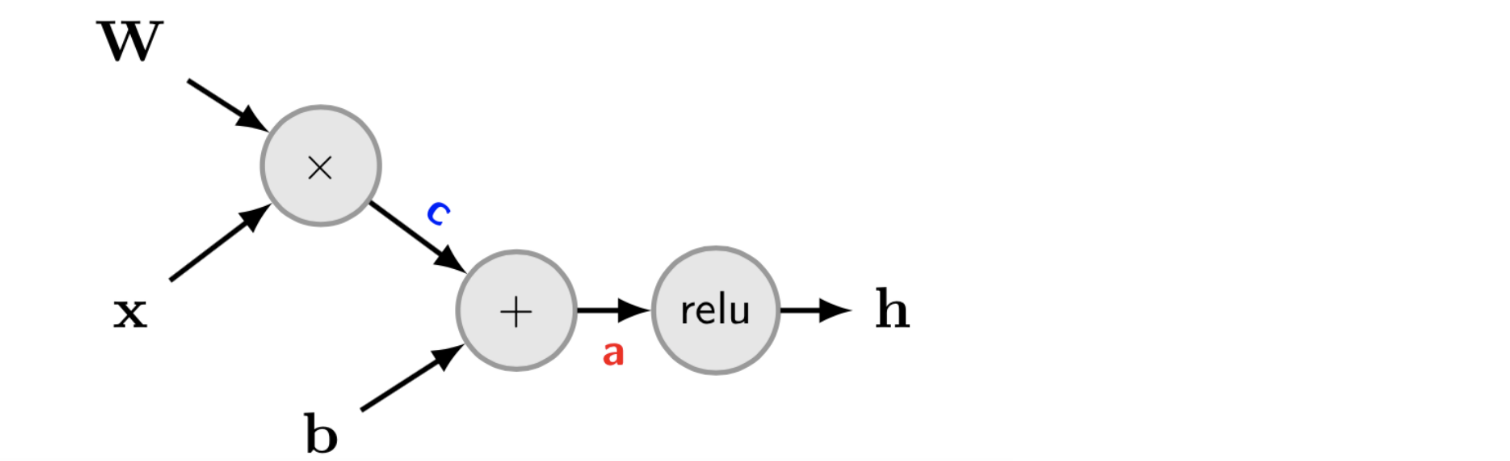

### Neural network layer in numpy

In [ ]:
import numpy as np

In [ ]:
num_in = 10
num_hidden = 50

# init numpy arrays
x = np.random.randn(num_in) # (10,)
W = np.random.randn(num_hidden, num_in) # (50,10)
b = np.random.randn(num_hidden) # (50,)

# forwad pass
a = np.matmul(W, x) + b # get affine output
h = np.maximum(a, np.zeros_like(a))

In [ ]:
# relu = lambda x: x*(x>0)
# h = relu(a) # relu

In [ ]:
# backward pass
dL = 1
da = np.expand_dims((a > 0) * dL, axis = 1) # (50,1)
dW = np.matmul(da, np.expand_dims(x, axis = 0)) # (50,1)*(1,10) = (50,10)
dx = np.matmul(W.T, da) # (10,50)*(50,1) = (10,1)

## Implementation in PyTorch

Most of the operations that we have in numpy have torch equivalents; usually look up in documentation.

In [ ]:
import torch

In [ ]:
num_in = 10
num_hidden = 50

# init tensors
x = torch.randn(num_in)
W = torch.randn(num_hidden, num_in)
b = torch.randn(num_hidden)

# forwad pass
a = torch.matmul(W, x) + b # get affine output
h = torch.max(a, torch.zeros(num_hidden)) # relu

But now PyTorch also, for each of these functions, implements its backward pass so it can automatically do backprop and calculate gradients for you.

In [ ]:
num_in = 10
num_hidden = 50

# init tensors with grad
x = torch.randn(num_in, requires_grad=True)
W = torch.randn(num_hidden, num_in, requires_grad=True)
b = torch.randn(num_hidden, requires_grad=True)

# forwad pass
a = torch.matmul(W, x) + b # get affine output
h = torch.max(a, torch.zeros(num_hidden)) # relu

print(x.data)
print(x.grad)

tensor([-0.6498, -0.2089,  0.4061, -0.1245, -1.4563,  0.1852,  1.4457, -0.3208,
         1.7306, -0.3605])
None


`x.grad` is NoneType because we have not done the backward pass.

In [ ]:
num_in = 10
num_hidden = 50

# init tensors with grad
x = torch.randn(num_in, requires_grad=True)
W = torch.randn(num_hidden, num_in, requires_grad=True)
b = torch.randn(num_hidden, requires_grad=True)

# forwad pass
a = torch.matmul(W, x) + b # get affine output
h = torch.max(a, torch.zeros(num_hidden)) # relu

# calculate loss
loss = (torch.sum(h) - 1).pow(2)

# do backward
loss.backward()

print("x type: {}, x.grad type: {}".format(x.dtype, x.grad.dtype))
print("x size: {}, x.grad size: {}".format(list(x.data.shape), list(x.grad.data.shape)))
print("W size: {}, W.grad size: {}".format(list(W.data.shape), list(W.grad.data.shape)))
print("b size: {}, b.grad size: {}".format(list(b.data.shape), list(b.grad.data.shape)))

x type: torch.float32, x.grad type: torch.float32
x size: [10], x.grad size: [10]
W size: [50, 10], W.grad size: [50, 10]
b size: [50], b.grad size: [50]


`x.data` contains the values of the PyTorch Tensor `x`. 

`x.grad` is another PyTorch Tensor containing the gradients of `x`. 

Therefore, `x.grad.data` contains the values of the gradients of `x`.

### It’s easy to go between NumPy and PyTorch

In [ ]:
import torch
import numpy as np 

data = [[1, 2],[3, 4]]
np_array = np.array(data)

# numpy array to torch tensor
x_tensor = torch.from_numpy(np_array)

# torch tensor to numpy array
x_array =  x_tensor.numpy()

print('x_tensor is:', x_tensor)
print('x_array is', x_array)

x_tensor is: tensor([[1, 2],
        [3, 4]])
x_array is [[1 2]
 [3 4]]


## Training a Classifier

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.


### What about data?

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

### The CIFAR10 dataset
For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![](https://pytorch.org/tutorials/_images/cifar10.png)


### Training an image classifier


We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

## Step 1: Load and normalize the dataset

Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

Note: If running on Windows and you get a `BrokenPipeError`, try setting the `num_worker` of `torch.utils.data.DataLoader()` to 0.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Visualize the dataset
Let us show some of the training images, for fun.

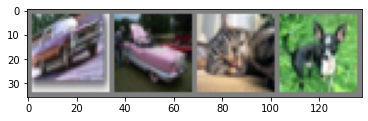

car   car   cat   dog  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Step 2: Define a Convolutional Neural Network

<!-- ![](https://pytorch.org/tutorials/_images/mnist.png) -->

![](https://camo.githubusercontent.com/f1083ab25e9eee6f771760514286b7f8d038be2381843acf74357deafbb4dce1/68747470733a2f2f692e737461636b2e696d6775722e636f6d2f744c4b597a2e706e67)


Modify the LeNet-5 neural network architecture and modify it to take 3-channel images (instead of 1-channel images as it was defined).


The network architecture accepts a 32x32xC image as input, where C is the number of color channels. Since CIFAR10 images are RGB images, C is 3 in this case.

Let’s define this network:

In [ ]:
import torch.nn as nn # torch neural network modules
import torch.nn.functional as F # torch functions, usually w/o learnable parameter


class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # 3: input image channel, 6: output channels, 5x5: square convolution kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # 10 for output classes

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = self.pool(F.relu(self.conv1(x)))
        # If the size is a square, you can specify with a single number
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. You can use any of the Tensor operations in the `forward` function.

The learnable parameters of a model are returned by `net.parameters()`.

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 3, 5, 5])


## Step 3: Define a Loss function and optimizer

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are several different [loss functions](https://pytorch.org/docs/nn.html#loss-functions) under the nn package. A simple loss is: `nn.MSELoss` which computes the mean-squared error between the input and the target.

Let's use a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Step 4: Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [ ]:
for epoch in range(2): # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
  
        # forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # backward + optimize
        loss.backward() # backward to get gradient values
        optimizer.step() # does the update

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # accumulate loss
        running_loss += loss.item()

In [ ]:
# # zero the gradients
# optimizer.zero_grad()

# # forward pass
# outputs = net(inputs)
# loss = criterion(outputs, labels)

# # backward + optimize
# loss.backward() # backward
# optimizer.step() # update

In [ ]:
# # forward pass
# outputs = net(inputs)
# loss = criterion(outputs, labels)

# # zero the gradients
# optimizer.zero_grad()

# # backward + optimize
# loss.backward() # backward
# optimizer.step() # update

In [ ]:
# # forward pass
# outputs = net(inputs)
# loss = criterion(outputs, labels)

# # backward + optimize
# loss.backward() # backward
# optimizer.step() # update

# # zero the gradients
# optimizer.zero_grad()

Let's quickly save our trained model:

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

See here https://pytorch.org/docs/stable/notes/serialization.html
for more details on saving PyTorch models.

## Step 5: Test the network on the test data

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

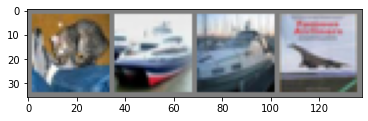

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 66.2 %
Accuracy for class: car   is 65.0 %
Accuracy for class: bird  is 38.2 %
Accuracy for class: cat   is 29.1 %
Accuracy for class: deer  is 44.2 %
Accuracy for class: dog   is 55.8 %
Accuracy for class: frog  is 69.2 %
Accuracy for class: horse is 70.2 %
Accuracy for class: ship  is 53.8 %
Accuracy for class: truck is 64.2 %


Okay, so what next?

How do we run these neural networks on the GPU?

## Training on GPU

Just like how you transfer a Tensor onto the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cpu


The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Remember that you will have to send the inputs and targets at every step
to the GPU too:

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)

In [ ]:
net.to(device) # send the net model to GPU

for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
    
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device) # send data to GPU

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # Does the update

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.232
[1,  4000] loss: 1.223
[1,  6000] loss: 1.187
[1,  8000] loss: 1.209
[1, 10000] loss: 1.235
[1, 12000] loss: 1.211
[2,  2000] loss: 1.203
[2,  4000] loss: 1.219
[2,  6000] loss: 1.222
[2,  8000] loss: 1.234
[2, 10000] loss: 1.212
[2, 12000] loss: 1.202
Finished Training


Why don't I notice MASSIVE speedup compared to CPU? Because your network
is really small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images


## Training on multiple GPUs

If you want to see even more MASSIVE speedup using all of your GPUs, please check out [Optional: Data Parallelism](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-pydata_parallel_tutorial.html).

## How to adjust learning rate

`torch.optim.lr_scheduler` provides several methods to adjust the learning rate based on the number of epochs.

Learning rate scheduling should be applied after optimizer’s update; e.g., you should write your code this way:

In [ ]:
# optimizer = SGD(model, 0.1)

# scheduler = ExponentialLR(optimizer, gamma=0.9) # Define the scheduler

# for epoch in range(20):
#     for input, target in dataset:
#         optimizer.zero_grad()
#         output = model(input)
#         loss = loss_fn(output, target)
#         loss.backward()
#         optimizer.step()
        
#     scheduler.step() # Learning rate scheduling

## Getting pre-trained models.
 
Import `torchvision` to get pretained models.

In [ ]:
import torchvision

# load pre-defined models
alexnet = torchvision.models.alexnet(pretrained=False)

# load pre-pretained models
alexnet = torchvision.models.alexnet(pretrained=True)
vgg16 = torchvision.models.vgg16(pretrained=True)
resnet152 = torchvision.models.resnet152(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

You can modify pre-trained models.



In [ ]:
model = torchvision.models.resnet101(pretrained=True)
# get features after the last AvgPool
modules = list(model.children())[:-1] # output of pool5: [2048,1,1]
model = torch.nn.Sequential(*modules)

In [ ]:
model = torchvision.models.__dict__['resnet101'](pretrained=False, num_classes=10) # 10 classes

## Saving and loading models

Save/Load state_dict (recommended):

In [ ]:
PATH = './cifar_net.pth'

# Save:
torch.save(net.state_dict(), PATH) # save state_dict

# Load:
model = Net()
model.load_state_dict(torch.load(PATH)) # load state_dict
model.eval() # sets model in evaluation (inference) mode

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Save/Load entire model:

In [ ]:
PATH = './cifar_net.pth'

# Save:
torch.save(net, PATH) # save state_dict

# Load:
model = torch.load(PATH) # model class must be defined somewhere
model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## Build your module

You can combine multiple layers into one module:

In [ ]:
class FCNet(nn.Module):

    def __init__(self, dims):
        super(FCNet, self).__init__()

        layers = []
        for i in range(len(dims)-2):
            in_dim = dims[i]
            out_dim = dims[i+1]
            layers.append(nn.Linear(in_dim, out_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=0.5))
        layers.append(nn.Linear(dims[-2], dims[-1]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(p=0.5))

        self.main = nn.Sequential(*layers)

    def forward(self, x):
        return self.main(x)


fcs = FCNet([16 * 5 * 5, 120, 84, 10])
print(fcs)

FCNet(
  (main): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=84, out_features=10, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
  )
)


## Define the user-specific function

A third order polynomial, trained to predict $y=\sin (x)$ from $-\pi$ to $\pi$ by minimizing squared Euclidean distance. Instead of writing the polynomial as $y=a+b x+c x^{2}+d x^{3}$, we write the polynomial as $y=a+b P_{3}(c+d x)$ where $P_3(x)= \frac{1}{2}\left(5x^3-3x \right)$ is the Legendre polynomial of degree three.

This implementation computes the forward pass using operations on PyTorch Tensors, and uses PyTorch autograd to compute gradients.

In this implementation, we implement our own custom autograd function to perform $P_{3}^{\prime}(x)$. By mathematics, $P_3'(x)= \frac{3}{2}\left(5x^2-1 \right)$.

In [ ]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

In [ ]:
import math

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    
    if t % 100 == 99:
        print(t, loss.item())
        
    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918998718262
1299 10.71425724029541
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003360748291016
1999 8.943639755249023
Result: y = -5.394172664097141e-09 + -2.208526849746704 * P3(1.367587154632588e-09 + 0.2554861009120941 x)
